# Capstone 2 Project
by Hans Darmawan - JCDS2602

## Import Needed Libraries and Configuring the Settings

In [223]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, spearmanr, skew, kurtosis
import numpy as np
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format','{:.2f}'.format)

## Read The .csv File

In [224]:
# Load the csv file
real_df = pd.read_csv("NYC TLC Trip Record.csv")

# Copy the DataFrame
df = real_df.copy()

# Display the first few rows of the DataFrame
df.head()


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.00,166,143,1.00,2.58,14.90,1.00,0.50,4.03,0.00,NaN,1.00,24.18,1.00,1.00,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.00,24,43,1.00,1.81,10.70,1.00,0.50,2.64,0.00,NaN,1.00,15.84,1.00,1.00,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.00,223,179,1.00,0.00,7.20,1.00,0.50,1.94,0.00,NaN,1.00,11.64,1.00,1.00,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.00,41,238,1.00,1.30,6.50,0.50,1.50,1.70,0.00,NaN,1.00,10.20,1.00,1.00,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.00,41,74,1.00,1.10,6.00,0.50,1.50,0.00,0.00,NaN,1.00,8.00,1.00,1.00,0.00


## Data Wrangling

In [225]:
# Display df Basic Informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [226]:
# Rename Columns Into snake_case Convention Based on PEP8 Standards
df = df.rename(columns={
    "VendorID": "vendor_id",
    "tpep_pickup_datetime": "pickup_datetime",
    "tpep_dropoff_datetime": "dropoff_datetime",
    "passenger_count": "passenger_count",
    "trip_distance": "trip_distance",
    "RatecodeID": "rate_code_id",
    "store_and_fwd_flag": "store_and_fwd_flag",
    "PULocationID": "pickup_location_id",
    "DOLocationID": "dropoff_location_id",
    "payment_type": "payment_type",
    "fare_amount": "fare_amount",
    "extra": "extra",
    "mta_tax": "mta_tax",
    "tip_amount": "tip_amount",
    "tolls_amount": "tolls_amount",
    "improvement_surcharge": "improvement_surcharge",
    "total_amount": "total_amount",
    "congestion_surcharge": "congestion_surcharge",
    "Trip_type": "trip_type"
})
df.head()

,vendor_id,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_code_id,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.00,166,143,1.00,2.58,14.90,1.00,0.50,4.03,0.00,NaN,1.00,24.18,1.00,1.00,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.00,24,43,1.00,1.81,10.70,1.00,0.50,2.64,0.00,NaN,1.00,15.84,1.00,1.00,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.00,223,179,1.00,0.00,7.20,1.00,0.50,1.94,0.00,NaN,1.00,11.64,1.00,1.00,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.00,41,238,1.00,1.30,6.50,0.50,1.50,1.70,0.00,NaN,1.00,10.20,1.00,1.00,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.00,41,74,1.00,1.10,6.00,0.50,1.50,0.00,0.00,NaN,1.00,8.00,1.00,1.00,0.00


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   vendor_id              68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   rate_code_id           63887 non-null  float64
 5   pickup_location_id     68211 non-null  int64  
 6   dropoff_location_id    68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [228]:
# Treat NA rows
df.isnull().sum()

vendor_id                    0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
rate_code_id              4324
pickup_location_id           0
dropoff_location_id          0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

In [229]:
# MCAR
df = df.drop(columns=["ehail_fee"])

In [230]:
# MAR
for column in ["store_and_fwd_flag", "rate_code_id", "payment_type"]:
    df[column] = df[column].fillna(df[column].mode()[0])

for column in ["passenger_count", "congestion_surcharge"]:
    df[column] = df[column].fillna(df[column].median())

In [231]:
# MNAR
mnar = ["trip_type"]
df["trip_type"] = df["trip_type"].fillna(df["trip_type"].mode()[0])

In [232]:
df.isnull().sum()

vendor_id                0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
rate_code_id             0
pickup_location_id       0
dropoff_location_id      0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

In [233]:
# Check for duplicate rows
df.duplicated().sum()

0

### Feature Engineering

In [234]:
# Convert datetime columns to datetime type
for column in ["lpep_pickup_datetime", "lpep_dropoff_datetime"]:
    df[column] = pd.to_datetime(df[column])

In [235]:
# Convert categorical columns to category type
for column in ["vendor_id", "store_and_fwd_flag", "rate_code_id", "payment_type", "trip_type", "pickup_location_id", "dropoff_location_id"]:
    df[column] = df[column].astype("category")

In [236]:
# Calculate trip duration in minutes
df["trip_duration"] = round((df["lpep_dropoff_datetime"] - df["lpep_pickup_datetime"]).dt.total_seconds() / 60, 2)

In [237]:
# Extract hour, day of week, and month from pickup datetime
df["pickup_hour"] = df["lpep_pickup_datetime"].dt.hour
df["pickup_day_of_week"] = df["lpep_pickup_datetime"].dt.dayofweek
df["pickup_month"] = df["lpep_pickup_datetime"].dt.month

In [238]:
# Map vendor_id to vendor_name
vendor_mapping = {
    1: "Creative Mobile Technologies, LLC.",
    2: "VeriFone Inc."
}
df["vendor_name"] = df["vendor_id"].map(vendor_mapping)

In [239]:
# Map rate_code_id to rate_code_name
rate_code_mapping = {
    1: "Standard Rate",
    2: "JFK",
    3: "Newark",
    4: "Nassau or Westchester",
    5: "Negotiated Fare",
    6: "Group Ride",
    99: "Unknown"
}
df["rate_code_name"] = df["rate_code_id"].map(rate_code_mapping)

In [240]:
# Map store_and_fwd_flag to store_and_fwd_flag
store_and_fwd_mapping = {
    "Y": "Store and Forward Trip",
    "N": "Not A Store and Forward Trip",
}
df["store_and_fwd_flag_name"] = df["store_and_fwd_flag"].map(store_and_fwd_mapping)

In [241]:
# Map payment_type to payment_type_name
payment_type_mapping = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided Trip"
}
df["payment_type_name"] = df["payment_type"].map(payment_type_mapping)

In [242]:
# Map trip_type to trip_type_name
trip_type_mapping = {
    1: "Street-hail",
    2: "Dispatch"
}
df["trip_type_name"] = df["trip_type"].map(trip_type_mapping)

In [243]:
df.head()

,vendor_id,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_code_id,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration,pickup_hour,pickup_day_of_week,pickup_month,vendor_name,rate_code_name,store_and_fwd_flag_name,payment_type_name,trip_type_name
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.00,166,143,1.00,2.58,14.90,1.00,0.50,4.03,0.00,1.00,24.18,1.00,1.00,2.75,11.02,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.00,24,43,1.00,1.81,10.70,1.00,0.50,2.64,0.00,1.00,15.84,1.00,1.00,0.00,6.77,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.00,223,179,1.00,0.00,7.20,1.00,0.50,1.94,0.00,1.00,11.64,1.00,1.00,0.00,6.33,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.00,41,238,1.00,1.30,6.50,0.50,1.50,1.70,0.00,1.00,10.20,1.00,1.00,0.00,5.82,0,6,1,"Creative Mobile Technologies, LLC.",Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.00,41,74,1.00,1.10,6.00,0.50,1.50,0.00,0.00,1.00,8.00,1.00,1.00,0.00,5.97,0,6,1,"Creative Mobile Technologies, LLC.",Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail


In [244]:
# Convert rate_code_id and passenger_count from float to integer
for column in ["rate_code_id", "passenger_count"]:
    df[column] = df[column].apply(lambda x: int(x))

In [245]:
df.head()

,vendor_id,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_code_id,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration,pickup_hour,pickup_day_of_week,pickup_month,vendor_name,rate_code_name,store_and_fwd_flag_name,payment_type_name,trip_type_name
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1,2.58,14.90,1.00,0.50,4.03,0.00,1.00,24.18,1.00,1.00,2.75,11.02,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1,1.81,10.70,1.00,0.50,2.64,0.00,1.00,15.84,1.00,1.00,0.00,6.77,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1,223,179,1,0.00,7.20,1.00,0.50,1.94,0.00,1.00,11.64,1.00,1.00,0.00,6.33,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1,1.30,6.50,0.50,1.50,1.70,0.00,1.00,10.20,1.00,1.00,0.00,5.82,0,6,1,"Creative Mobile Technologies, LLC.",Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1,1.10,6.00,0.50,1.50,0.00,0.00,1.00,8.00,1.00,1.00,0.00,5.97,0,6,1,"Creative Mobile Technologies, LLC.",Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail


In [246]:
# Sort the DataFrame by lpep_pickup_datetime
df = df.sort_values(by="lpep_pickup_datetime", ascending=True)

In [247]:
# Save the cleaned DataFrame to a CSV file
df.to_csv("NYC TLC Trip Record - Clean.csv", index=False, sep = ";")

## Exploratory Data Analysis (EDA)

In [248]:
df.describe()

,lpep_pickup_datetime,lpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration,pickup_hour,pickup_day_of_week,pickup_month
count,68211,68211,68211.00,68211.00,68211.00,68211.00,68211.00,68211.00,68211.00,68211.00,68211.00,68211.00,68211.00,68211.00,68211.00,68211.00
mean,2023-01-16 20:10:55.679524096,2023-01-16 20:29:01.515767040,1.30,8.11,16.60,0.83,0.59,2.14,0.17,0.95,21.79,0.68,18.10,13.81,2.85,1.00
min,2009-01-01 20:21:27,2009-01-02 11:07:31,0.00,0.00,-70.00,-2.50,-0.50,-10.50,0.00,-1.00,-71.50,-2.75,0.00,0.00,0.00,1.00
25%,2023-01-09 11:59:47.500000,2023-01-09 12:16:37.500000,1.00,1.11,9.30,0.00,0.50,0.00,0.00,1.00,12.90,0.00,7.22,10.00,1.00,1.00
50%,2023-01-17 08:40:42,2023-01-17 08:56:38,1.00,1.85,13.50,0.00,0.50,1.60,0.00,1.00,17.90,0.00,11.40,14.00,3.00,1.00
75%,2023-01-24 15:52:30,2023-01-24 16:06:56,1.00,3.21,19.80,1.00,0.50,3.33,0.00,1.00,26.15,0.00,17.48,18.00,4.00,1.00
max,2023-02-01 03:10:05,2023-02-01 17:27:05,9.00,120098.84,490.00,12.50,2.75,222.22,36.05,1.00,491.00,2.75,1439.88,23.00,6.00,12.00
std,NaN,NaN,0.95,585.11,13.47,1.27,0.39,3.05,1.10,0.20,15.46,1.19,74.93,5.23,1.96,0.06


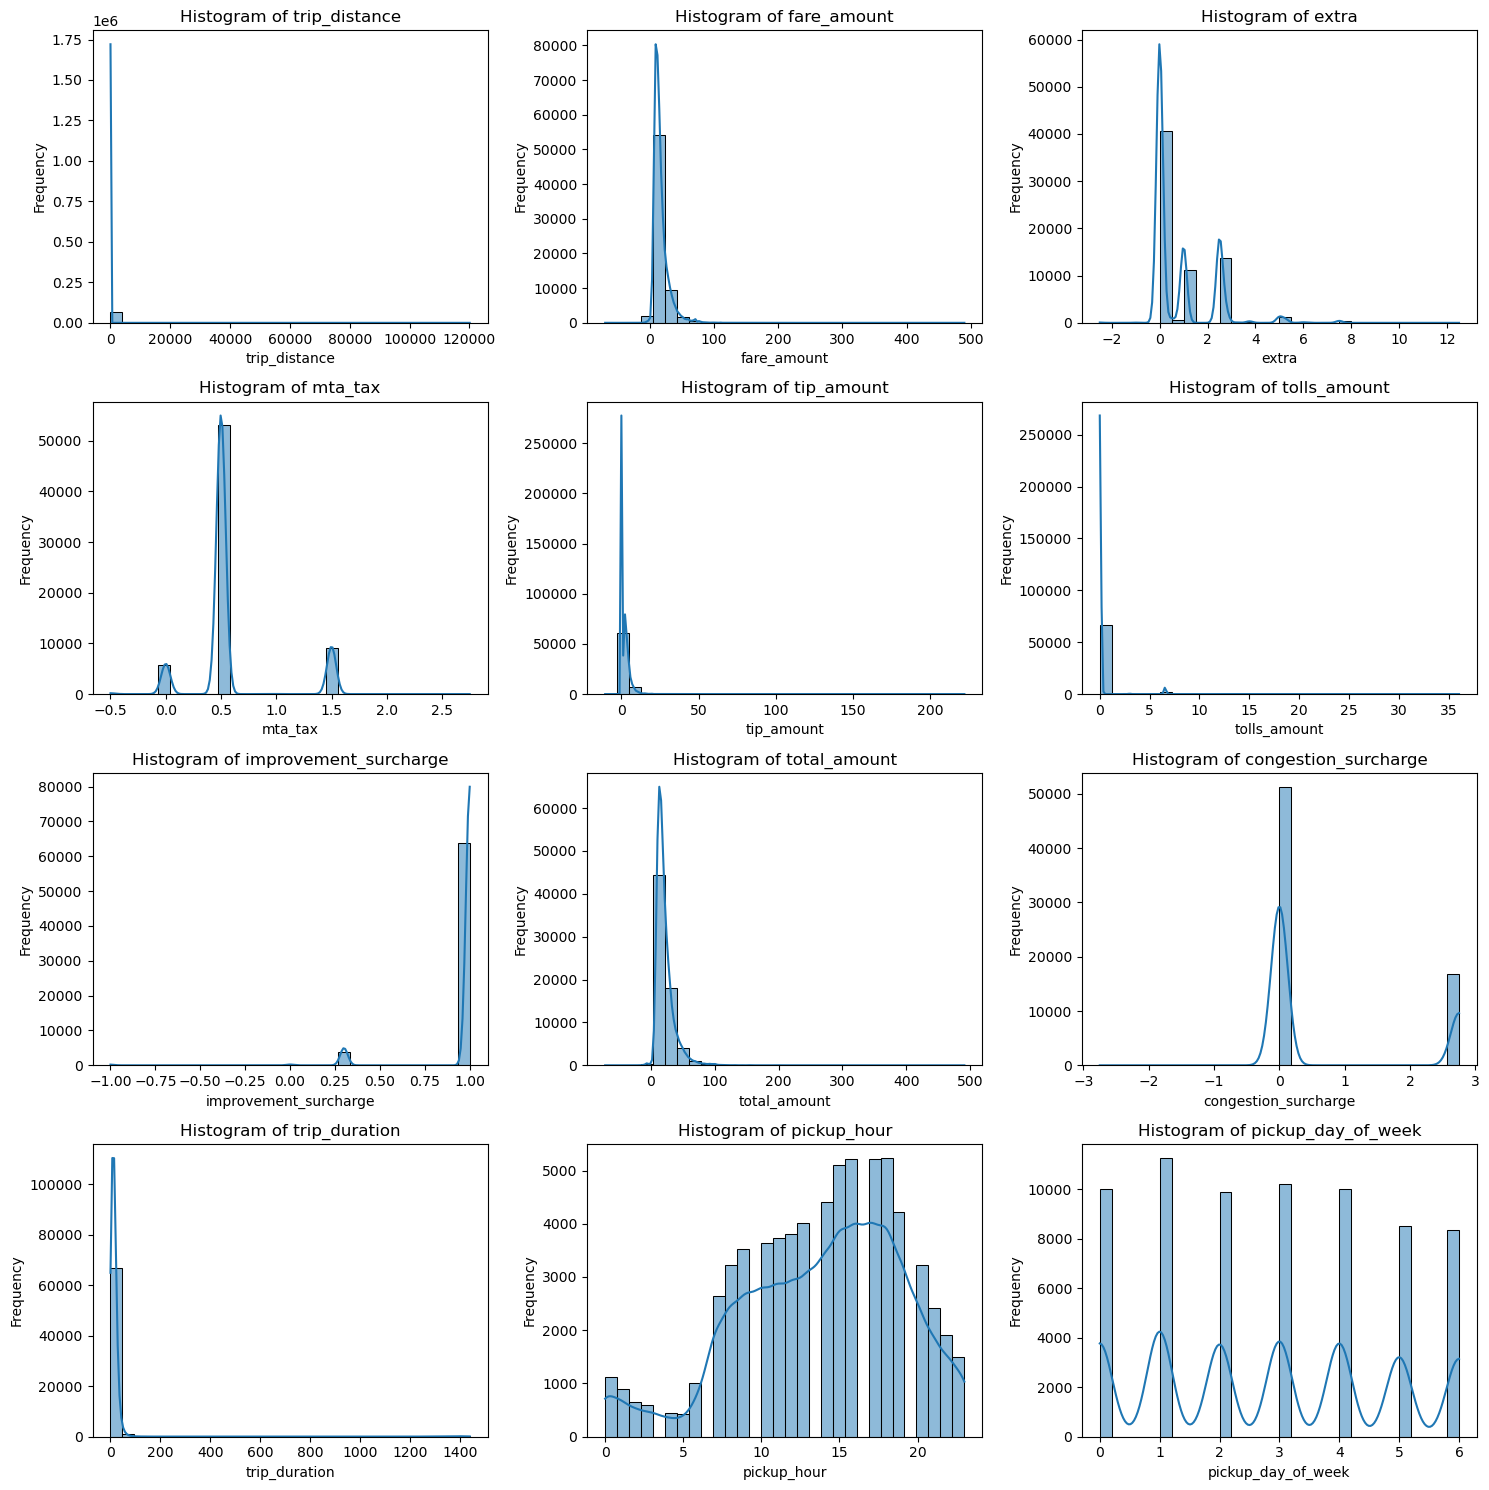

In [249]:
# List of columns to plot
columns = [
    'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
    'tolls_amount', 'improvement_surcharge', 'total_amount',
    'congestion_surcharge', 'trip_duration', 'pickup_hour',
    'pickup_day_of_week', 'pickup_month'
]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Loop through each column and create a histogram
for ax, column in zip(axes, columns):
    sns.histplot(df[column], bins=30, kde=True, ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout
plt.show()  # Show the plot

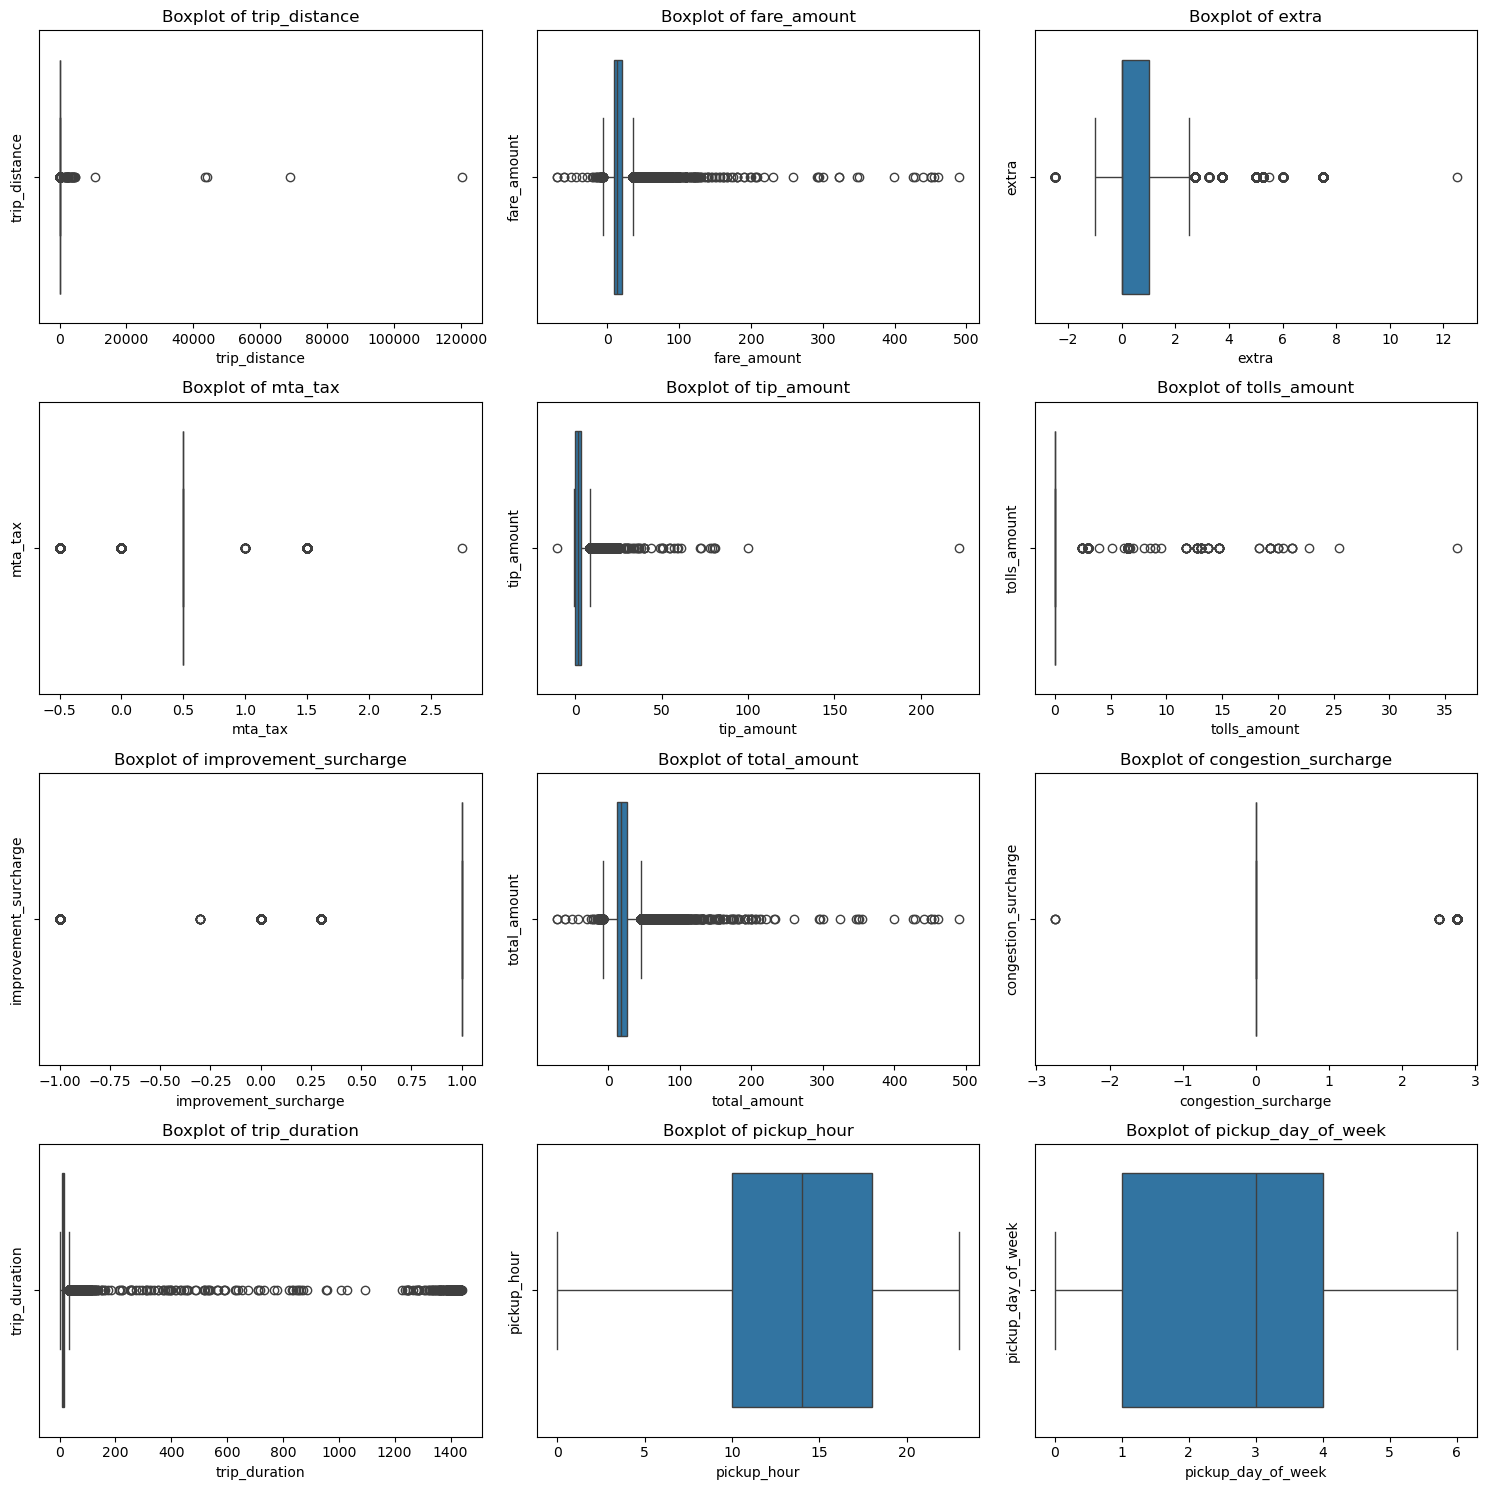

In [250]:
# List of columns to plot
columns = [
    'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
    'tolls_amount', 'improvement_surcharge', 'total_amount',
    'congestion_surcharge', 'trip_duration', 'pickup_hour',
    'pickup_day_of_week', 'pickup_month'
]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Loop through each column and create a boxplot
for ax, column in zip(axes, columns):
    sns.boxplot(df[column], ax=ax, orient="h")
    ax.set_title(f'Boxplot of {column}')
    ax.set_ylabel(column)

plt.tight_layout()  # Adjust layout
plt.show()  # Show the plot


In [251]:
results = []
for column in columns:
    if column in df.columns:
        # Calculate statistics
        q1 = df[column].quantile(0.25)
        q2 = df[column].quantile(0.50)  # Median
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        skewness = df[column].skew()
        kurt = df[column].kurtosis()

        # Determine skewness direction
        skewness_type = "Normal"
        if skewness < 0:
            skewness_type = "Left Skewed"
        elif skewness > 0:
            skewness_type = "Right Skewed"

        # Determine kurtosis type
        if kurt < 0:
            kurtosis_type = "Platykurtic"
        elif kurt > 0:
            kurtosis_type = "Leptokurtic"
        else:
            kurtosis_type = "Mesokurtic"

        results.append([column,skewness_type,kurtosis_type,q1,q2,q3,iqr,lower_bound,upper_bound])

visual_results = pd.DataFrame(results, columns=["column","skewness_type","kurtosis_type","q1","q2","q3","iqr","lower_bound","upper_bound"])
visual_results

,column,skewness_type,kurtosis_type,q1,q2,q3,iqr,lower_bound,upper_bound
0,trip_distance,Right Skewed,Leptokurtic,1.11,1.85,3.21,2.10,-2.04,6.36
1,fare_amount,Right Skewed,Leptokurtic,9.30,13.50,19.80,10.50,-6.45,35.55
2,extra,Right Skewed,Leptokurtic,0.00,0.00,1.00,1.00,-1.50,2.50
3,mta_tax,Right Skewed,Leptokurtic,0.50,0.50,0.50,0.00,0.50,0.50
4,tip_amount,Right Skewed,Leptokurtic,0.00,1.60,3.33,3.33,-5.00,8.32
5,tolls_amount,Right Skewed,Leptokurtic,0.00,0.00,0.00,0.00,0.00,0.00
6,improvement_surcharge,Left Skewed,Leptokurtic,1.00,1.00,1.00,0.00,1.00,1.00
7,total_amount,Right Skewed,Leptokurtic,12.90,17.90,26.15,13.25,-6.97,46.02
8,congestion_surcharge,Right Skewed,Platykurtic,0.00,0.00,0.00,0.00,0.00,0.00
9,trip_duration,Right Skewed,Leptokurtic,7.22,11.40,17.48,10.26,-8.17,32.87


In [252]:
results = []

for column in df:
    if df[column].dtype in ["float64","int64", "int32"]:
        stats, pval = shapiro(df[column])
        results.append([column,stats,pval])

shapiro_df = pd.DataFrame(results, columns=["column", "statistic", "p_value"])
shapiro_df["alpha"] = 0.05
shapiro_df["reject_h0"] = shapiro_df["p_value"] <= shapiro_df["alpha"]

In [253]:
shapiro_df

,column,statistic,p_value,alpha,reject_h0
0,passenger_count,0.37,0.00,0.05,True
1,trip_distance,0.00,0.00,0.05,True
2,fare_amount,0.64,0.00,0.05,True
3,extra,0.68,0.00,0.05,True
4,mta_tax,0.60,0.00,0.05,True
5,tip_amount,0.64,0.00,0.05,True
6,tolls_amount,0.14,0.00,0.05,True
7,improvement_surcharge,0.25,0.00,0.05,True
8,total_amount,0.70,0.00,0.05,True
9,congestion_surcharge,0.54,0.00,0.05,True


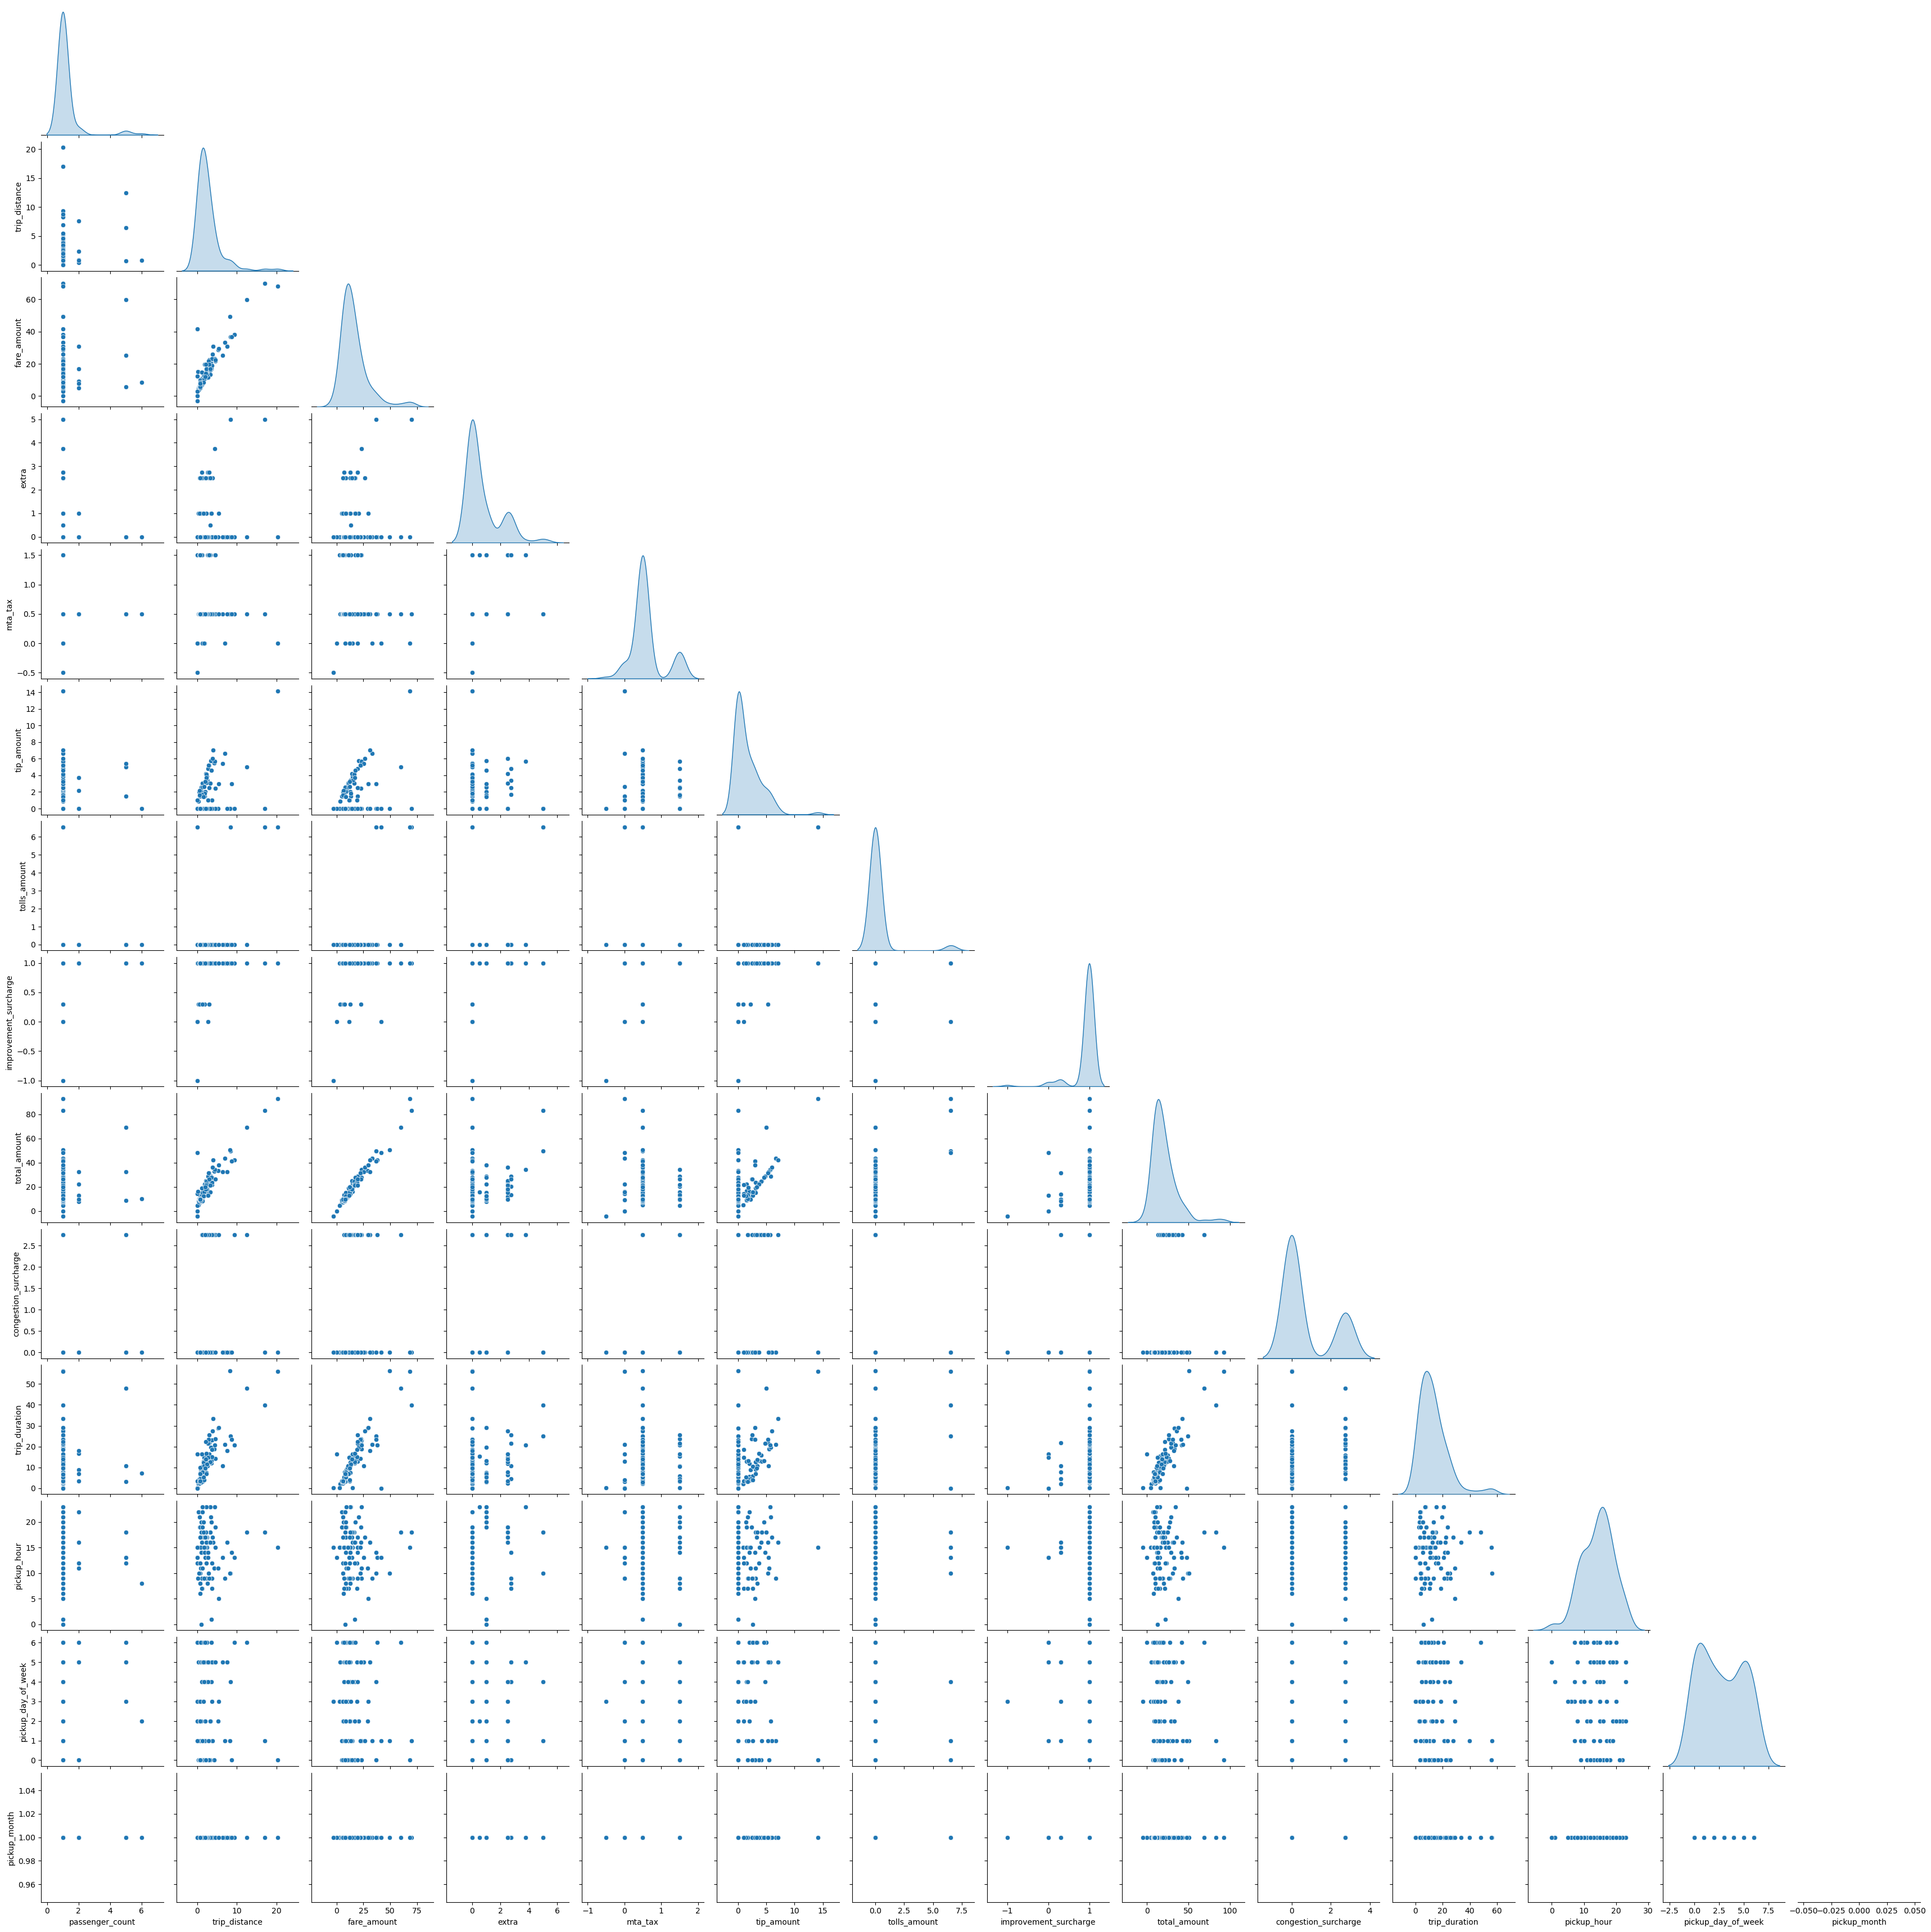

In [254]:
sns.pairplot(df.sample(100, random_state=42), corner=True, diag_kind='kde')
plt.show()

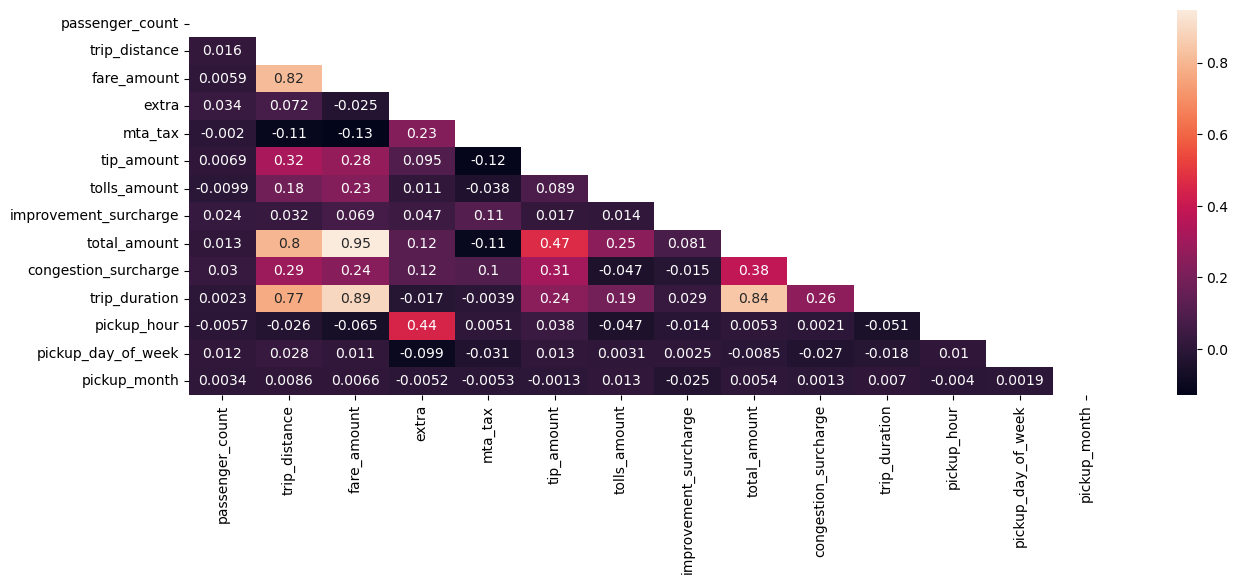

In [255]:
spearman_matrix = df.corr(numeric_only=True, method="spearman").fillna(0)
mask = np.triu(np.ones_like(spearman_matrix)) 
plt.figure(figsize=(15,5))
corr_map = sns.heatmap(spearman_matrix, annot=True, mask=mask) 
plt.show(corr_map)

In [256]:
columns = [column for column in df if df[column].dtype in ["float64", "int64", "int32"]]
results = []
for length in columns:
    for width in columns:
        stats, pval = spearmanr(df[length], df[width])
        results.append([length, width, stats])

spearman_df = pd.DataFrame(results, columns=["col_1", "col_2", "correlation_value"])
spearman_df = spearman_df[spearman_df["col_2"] != spearman_df ["col_1"]]
spearman_df = spearman_df.sort_values(by="correlation_value",ascending=False).reset_index().drop(columns=["index"])
spearman_df["odd_even"] = spearman_df.index % 2
spearman_df = spearman_df[spearman_df["odd_even"]==0]
spearman_df = spearman_df.drop(columns=["odd_even"])

In [257]:
spearman_df["direction"] = spearman_df["correlation_value"].apply(lambda x: "Directly Proportional" if x>0 else "Inversely Proportional" if x<0 else "Neutral")
spearman_df["correlation_power"] = spearman_df["correlation_value"].apply(lambda x: "Neutral" if x==0 else "Strong" if 0.7<=x<=1 else "Moderate" if 0.3<=x<0.7 else "Weak")

In [258]:
spearman_df = spearman_df[spearman_df["correlation_value"]!=0]
spearman_df

,col_1,col_2,correlation_value,direction,correlation_power
0,total_amount,fare_amount,0.95,Directly Proportional,Strong
2,fare_amount,trip_duration,0.89,Directly Proportional,Strong
4,total_amount,trip_duration,0.84,Directly Proportional,Strong
6,fare_amount,trip_distance,0.82,Directly Proportional,Strong
8,trip_distance,total_amount,0.80,Directly Proportional,Strong
10,trip_duration,trip_distance,0.77,Directly Proportional,Strong
12,tip_amount,total_amount,0.47,Directly Proportional,Moderate
14,pickup_hour,extra,0.44,Directly Proportional,Moderate
16,congestion_surcharge,total_amount,0.38,Directly Proportional,Moderate
18,trip_distance,tip_amount,0.32,Directly Proportional,Moderate


In [259]:
df.dtypes

vendor_id                        category
lpep_pickup_datetime       datetime64[ns]
lpep_dropoff_datetime      datetime64[ns]
store_and_fwd_flag               category
rate_code_id                     category
pickup_location_id               category
dropoff_location_id              category
passenger_count                     int64
trip_distance                     float64
fare_amount                       float64
extra                             float64
mta_tax                           float64
tip_amount                        float64
tolls_amount                      float64
improvement_surcharge             float64
total_amount                      float64
payment_type                     category
trip_type                        category
congestion_surcharge              float64
trip_duration                     float64
pickup_hour                         int32
pickup_day_of_week                  int32
pickup_month                        int32
vendor_name                      c

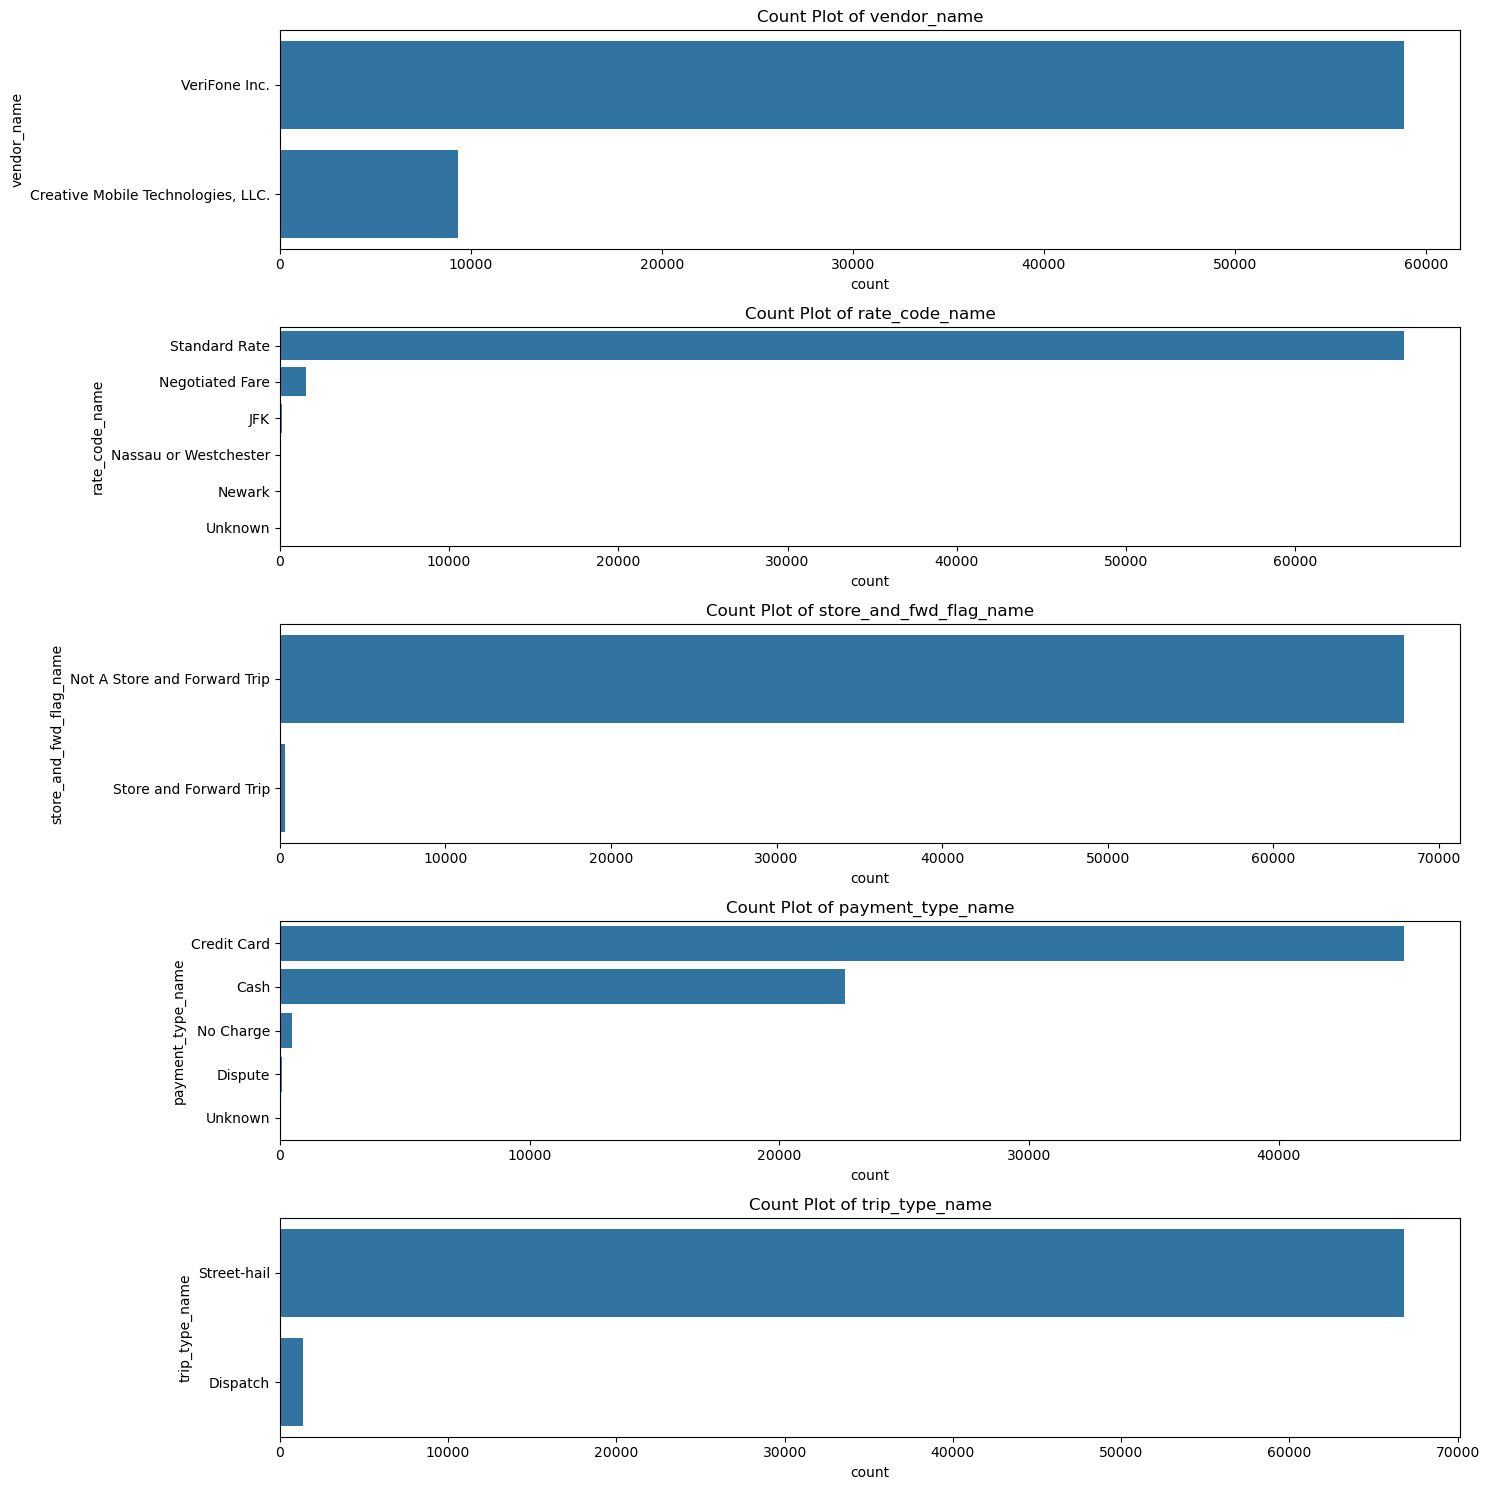

In [260]:
# List of columns to plot
columns = [
    'vendor_name', 'rate_code_name', 'store_and_fwd_flag_name', 'payment_type_name', 'trip_type_name'
]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 15))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Loop through each column and create a boxplot
for ax, column in zip(axes, columns):
    sns.countplot(df[column], ax=ax, order = df[column].value_counts().index)
    ax.set_title(f'Count Plot of {column}')
    ax.set_ylabel(column)

plt.tight_layout()  # Adjust layout
plt.show()  # Show the plot
